In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# **Fisher** Data Processing Overview

* This guide details the process for preparing the "Fisher-Data.csv" for analysis, covering data loading, cleaning, and selection of PHQ-2 relevant columns.

### Load Data

In [2]:
import pandas as pd
# Load data from CSV file
df = pd.read_csv("Fisher-Data.csv")
print("Initial DataFrame shape:", df.shape)  # Display the initial shape of the DataFrame
df.head(2)  # Display the first two rows for a quick data inspection

Initial DataFrame shape: (5327, 35)


,start,finish,energetic,enthusiastic,content,irritable,restless,worried,guilty,afraid,...,difficult,unsatisfy,avoid_people,NA.,NA..1,NA..2,lag,tdif,cumsumT,Subject
0,10/21/2014 17:55,10/21/2014 17:58,19.0,23.0,33.0,74.0,89.0,87.0,72.0,70.0,...,63.0,69.0,75.0,NaN,0.000000,0.000000,NaN,0.000000,0.000000,P001_final
1,10/21/2014 21:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10/21/2014 17:55,3.416667,3.416667,10/21/2014 17:55,3.416667,3.416667,P001_final


### Cleaning Data

- Convert dates to datetime format, remove duplicates, and standardize the data format.

In [3]:
# Convert 'start' column to datetime format for accurate analysis
df['date'] = pd.to_datetime(df['start'], format='%m/%d/%Y %H:%M')
df['day'] = pd.to_datetime(df['start']).dt.date
df['day'] = pd.to_datetime(df['day'])

# Display DataFrame columns, unique subjects, shape, and check for duplicated columns
print("DataFrame columns:", df.columns)
print("Number of unique subjects:", df['Subject'].nunique())
print("DataFrame shape after initial cleaning:", df.shape)
print("Duplicated columns:", df.columns[df.columns.duplicated()])

# Clean 'Subject' column by removing '_final' from its values
df['id'] = df['Subject'].str.replace('_final', '')


DataFrame columns: Index(['start', 'finish', 'energetic', 'enthusiastic', 'content', 'irritable',
       'restless', 'worried', 'guilty', 'afraid', 'anhedonia', 'angry',
       'hopeless', 'down', 'positive', 'fatigue', 'tension', 'concentrate',
       'accepted', 'threatened', 'ruminate', 'avoid_act', 'reassure',
       'procrast', 'hours', 'difficult', 'unsatisfy', 'avoid_people', 'NA.',
       'NA..1', 'NA..2', 'lag', 'tdif', 'cumsumT', 'Subject', 'date', 'day'],
      dtype='object')
Number of unique subjects: 40
DataFrame shape after initial cleaning: (5327, 37)
Duplicated columns: Index([], dtype='object')


### Selecting PHQ-2 Data

In [6]:
# Rename columns for clarity in PHQ-2 analysis
df = df.rename(columns={'anhedonia': 'phq2_1', 'down': 'phq2_2'})
# Select only relevant columns for PHQ-2 analysis
df_phq2 = df[['id', 'day', 'date', 'phq2_1', 'phq2_2']]

# Display unique 'id' count and data types for PHQ-2 DataFrame
print("Unique IDs in PHQ-2 DataFrame:", df_phq2['id'].nunique())
print("Data types in PHQ-2 DataFrame:", df_phq2.dtypes)

# Define a custom function to check if all values in date columns are NaN for a group
def all_dates_nan(group):
    return group['day'].isna().all()

# Filter out groups where all 'day' values are NaN
df_phq2_v1 = df_phq2.groupby('id').filter(lambda x: not all_dates_nan(x))
print("Data after removing user IDs with all NaN dates:", round((len(df_phq2_v1) / len(df_phq2)) * 100, 2), "%")
print("Null values in df_phq2_v1:", df_phq2_v1.isnull().sum())

# Remove rows with NaN in 'day' column
df_phq2_v2 = df_phq2_v1.dropna(subset=['day']).reset_index(drop=True)
print("Data after removing NaN dates:", round((len(df_phq2_v2) / len(df_phq2_v1)) * 100, 2), "%")
print("Null values in df_phq2_v2:", df_phq2_v2.isnull().sum())

# Remove rows with NaN in 'phq2_1' and 'phq2_2' columns
df_phq2_v3 = df_phq2_v2.dropna(subset=['phq2_1', 'phq2_2']).reset_index(drop=True)
print("Data after removing NaN PHQ-2 values:", round((len(df_phq2_v3) / len(df_phq2_v2)) * 100, 2), "%")
print("Null values in df_phq2_v3:", df_phq2_v3.isnull().sum())

# Remove duplicate rows
df_phq2_clean = df_phq2_v3.drop_duplicates()
print("Data after removing duplicates:", round((len(df_phq2_clean) / len(df_phq2_v3)) * 100, 2), "%")
print("Null values in df_phq2_clean:", df_phq2_clean.isnull().sum())

# Summary of data cleaning and selection process
print('Final DataFrame shape:', df.shape)
print('Unique IDs in final DataFrame:', df['id'].nunique())
print('Shape of PHQ-2 DataFrame at various cleaning stages:')
print('Initial:', df_phq2.shape, 'Unique IDs:', df_phq2['id'].nunique())
print('After removing all NaN dates:', df_phq2_v1.shape, 'Unique IDs:', df_phq2_v1['id'].nunique())
print('After removing NaN dates:', df_phq2_v2.shape, 'Unique IDs:', df_phq2_v2['id'].nunique())
print('After removing NaN PHQ-2 values:', df_phq2_v3.shape, 'Unique IDs:', df_phq2_v3['id'].nunique())
print('After removing duplicates:', df_phq2_clean.shape, 'Unique IDs:', df_phq2_clean['id'].nunique())
df_phq2_clean.head(1)  # Display the first row of the cleaned PHQ-2 DataFrame for verification


Unique IDs in PHQ-2 DataFrame: 40
Data types in PHQ-2 DataFrame: id                object
day       datetime64[ns]
date      datetime64[ns]
phq2_1           float64
phq2_2           float64
dtype: object
Data after removing user IDs with all NaN dates: 100.0 %
Null values in df_phq2_v1: id          0
day         0
date        0
phq2_1    785
phq2_2    785
dtype: int64
Data after removing NaN dates: 100.0 %
Null values in df_phq2_v2: id          0
day         0
date        0
phq2_1    785
phq2_2    785
dtype: int64
Data after removing NaN PHQ-2 values: 85.26 %
Null values in df_phq2_v3: id        0
day       0
date      0
phq2_1    0
phq2_2    0
dtype: int64
Data after removing duplicates: 100.0 %
Null values in df_phq2_clean: id        0
day       0
date      0
phq2_1    0
phq2_2    0
dtype: int64
Final DataFrame shape: (5327, 38)
Unique IDs in final DataFrame: 40
Shape of PHQ-2 DataFrame at various cleaning stages:
Initial: (5327, 5) Unique IDs: 40
After removing all NaN dates: (5327,

,id,day,date,phq2_1,phq2_2
0,P001,2014-10-21,2014-10-21 17:55:00,74.0,85.0


- **Consistency in Unique IDs**: Maintained 40 unique IDs, indicating no loss of user data through the cleaning stages.

### Data Cleaning Impact & Duration Analysis

- **Purpose**: Determine the data's time span for each ID.

- **Approach**: Calculate date ranges and durations to identify temporal patterns and biases.

In [7]:
#import pandas as pd

# Combine value counts from each stage of data cleaning into a single DataFrame
smpl_num = pd.DataFrame({
    'df': df['id'].value_counts(),  # Original DataFrame
    'df_phq2': df_phq2['id'].value_counts(),  # After selecting PHQ-2 columns
    'df_phq2_v1': df_phq2_v1['id'].value_counts(),  # After removing IDs with all NaN dates
    'df_phq2_v2': df_phq2_v2['id'].value_counts(),  # After removing NaN dates
    'df_phq2_v3': df_phq2_v3['id'].value_counts(),  # After removing NaN PHQ-2 values
    'df_phq2_clean': df_phq2_clean['id'].value_counts()  # Final cleaned DataFrame
})

# Calculate date range and duration for each 'id' in the cleaned DataFrame
date_range = df_phq2_clean.groupby('id')['day'].agg(['min', 'max'])
date_range['duration_days'] = (date_range['max'] - date_range['min']).dt.days

# Merge the sample number DataFrame with the date range information
df_smpl_num = smpl_num.merge(date_range, how='left', left_index=True, right_index=True)
df_smpl_num = df_smpl_num.sort_values(by='duration_days', ascending=False)  # Sort by duration in descending order

# Display the combined DataFrame with sample numbers and date range information
df_smpl_num


,df,df_phq2,df_phq2_v1,df_phq2_v2,df_phq2_v3,df_phq2_clean,min,max,duration_days
P113,213,213,213,213,143,143,2015-10-08,2015-12-01,54
P014,156,156,156,156,115,115,2014-12-03,2015-01-12,40
p007,158,158,158,158,151,151,2014-10-29,2014-12-08,40
P117,153,153,153,153,113,113,2015-10-24,2015-12-01,38
P001,152,152,152,152,137,137,2014-10-21,2014-11-28,38
p008,156,156,156,156,120,120,2014-11-04,2014-12-12,38
P075,145,145,145,145,111,111,2015-06-25,2015-07-31,36
P217,143,143,143,143,109,109,2016-12-14,2017-01-19,36
P009,145,145,145,145,115,115,2014-11-11,2014-12-17,36
P163,138,138,138,138,123,123,2016-05-13,2016-06-17,35


# **Upsampling** for Temporal Resolution Enhancement

To ensure consistent analysis across datasets with varying temporal resolutions, we implemented an upsampling technique to standardize measurement frequency.

### Overview

- **Dataset 1(WARN)**: Daily measurements.
- **Dataset 2(Fisher)**: Four measurements per day.

The goal was to harmonize these datasets for comparative analysis.

### Methodology

Upsampling was achieved through:

1. **Data Expansion**: Duplicate entries to create four daily instances for any day with at least one measurement.

2. **Linear Interpolation**: Fill in newly created time points by assuming a linear trend between existing measurements.

This approach minimizes assumptions, simplifying the estimation of intra-day symptom variations.


In [8]:
#import pandas as pd
import numpy as np

# Select relevant columns from the cleaned PHQ-2 DataFrame
df_PHQ2 = df_phq2_clean[['id', 'day', 'phq2_1', 'phq2_2']]
print("Shape of the DataFrame:", df_PHQ2.shape)
print("Unique IDs:", df_PHQ2['id'].nunique())

def expand_group(group, size=8):
    # Get the first row of the group to replicate
    first_row = group.iloc[0]
    # Create a new DataFrame with 'size' identical rows
    new_group = pd.DataFrame([first_row] * size)
    # Set the last 'size - 1' rows to NaN for all columns except 'id' and 'day'
    new_group.iloc[1:, 2:] = np.nan  # Fill NaNs in all new rows except the first one
    return new_group

# Apply the expansion function to each group and interpolate
df_PHQ2_intrplt = df_PHQ2.groupby(['id', 'day'], group_keys=False).apply(expand_group).reset_index(drop=True)
df_PHQ2_intrplt['phq2_1'] = df_PHQ2_intrplt.groupby(['id', 'day'], group_keys=False)['phq2_1'].apply(lambda group: group.interpolate(method='linear'))
df_PHQ2_intrplt['phq2_2'] = df_PHQ2_intrplt.groupby(['id', 'day'], group_keys=False)['phq2_2'].apply(lambda group: group.interpolate(method='linear'))

# Reset the index of the interpolated DataFrame
df_PHQ2_intrplt.reset_index(drop=True, inplace=True)
df_PHQ2_intrplt.head(2)

Shape of the DataFrame: (4542, 4)
Unique IDs: 40


,id,day,phq2_1,phq2_2
0,P001,2014-10-21,74.0,85.0
1,P001,2014-10-21,74.0,85.0


# **Welch's** Method for PSD Analysis

We explore **Power Spectrum Density** (PSD) analysis using Welch's method to understand depressive symptom fluctuations in **Ecological Momentary Assessment** (EMA) data.


### Methodology

Welch's method estimates signal power across frequencies by:

- **Segmentation**: 256 segments with 50% overlap reduce noise.

- **Averaging Periodograms**: Enhances signal-to-noise ratio, clarifying dominant frequencies.

### Preprocessing

1. **Mean Calculation**: Average PHQ-2 scores for a simplified dataset.

2. **Standardization**: Convert means to z-scores per participant for uniformity.

This preparation ensures accurate PSD analysis, offering insights into symptom patterns.


In [9]:
#import numpy as np
#import pandas as pd
from scipy.stats import zscore

# Calculate the mean of PHQ-2 scores
df_PHQ2_intrplt['phq2_m'] = df_PHQ2_intrplt.iloc[:, 3:5].mean(axis=1)

# Standardize the mean PHQ-2 scores to z-scores within each participant
df_PHQ2_intrplt['phq2_m_z'] = df_PHQ2_intrplt.groupby('id')['phq2_m'].transform(
    lambda x: zscore(x, ddof=1) if np.std(x, ddof=1) > 0 else [0]*len(x)
)

print(df_PHQ2_intrplt.shape)


(10864, 6)


In [10]:
import scipy.signal

# Group by user_id
g = df_PHQ2_intrplt.groupby('id')
results = []

# For each user, compute the power spectral density using Welch's method
for user_id, group in g:
    symptoms_n = group['phq2_m_z']
    f, Pxx_den = scipy.signal.welch(symptoms_n, fs=8, window='hamming', nperseg=256, nfft=256)

    # Append results to the list
    for freq, pxx in zip(f, Pxx_den):
        results.append({
            'id': user_id,
            'freq': round(freq, 3),
            'pxx': pxx
        })

# Convert results to a DataFrame
df_f_ppx = pd.DataFrame(results)
print(df_f_ppx.shape)
print(df_f_ppx['freq'].nunique())
df_f_ppx.head(2)

(5160, 3)
129


,id,freq,pxx
0,P001,0.000,0.101882
1,P001,0.031,1.478032


## **Cumulative** Integral of PSD Values Analysis

We enhance our PSD analysis by calculating the cumulative integral of PSD values to assess the power distribution across frequency bands.


### Methodology

- **Sorting**: Arrange PSD values by frequency for each participant.

- **Cumulative Integral**: Apply the trapezoidal rule to compute the cumulative integral across frequencies.

In [11]:
import pandas as pd
from scipy import integrate
import numpy as np

# Assuming df_f_ppx is your DataFrame containing the PSD analysis results

def calculate_cumulative_integral(group):
    # Sort the group by 'freq'
    sorted_group = group.sort_values(by='freq')

    # Extract 'freq' and 'pxx' as numpy arrays
    freq_values = sorted_group['freq'].to_numpy()
    pxx_values = sorted_group['pxx'].to_numpy()

    # Calculate the cumulative integral using the trapezoidal rule
    cumulative_integral = integrate.cumulative_trapezoid(pxx_values, freq_values, initial=0)

    # Add the cumulative integral to the group
    sorted_group['cum_integ'] = cumulative_integral

    # Calculate the total integral (last value of the cumulative integral)
    total_integral = cumulative_integral[-1]

    # Convert the cumulative integral to a percentage of the total
    sorted_group['cum_prc'] = (sorted_group['cum_integ'] / total_integral) * 100

    return sorted_group

# Apply the function to each group
df_f_ppx_cum = df_f_ppx.groupby('id').apply(calculate_cumulative_integral).reset_index(drop=True)

# Adding a logarithmic transformation of the cumulative percentage for better visualization and analysis
df_f_ppx_cum['ppx_log'] = np.log10(df_f_ppx_cum['cum_prc'])

df_f_ppx_cum.head(2)

,id,freq,pxx,cum_integ,cum_prc,ppx_log
0,P001,0.000,0.101882,0.000000,0.000000,-inf
1,P001,0.031,1.478032,0.024489,2.572131,0.410293


## Frequency to Time Interval Mapping

This phase enhances our PSD analysis by associating specific frequency bands with time intervals, aiding in the interpretation of temporal dynamics in depressive symptoms.

### Methodology

- **Frequency Selection**: Identify key frequencies relevant to our research goals.

- **Time Interval Mapping**: Link each frequency to a descriptive time interval, highlighting its temporal relevance.

This mapping provides clearer insights into how symptom dynamics unfold over time.


In [12]:
#import pandas as pd

# Initialize the provided freq and time_intervals lists
sample_F = [0.031, 0.062, 0.094, 0.125, 0.156, 0.188, 0.25, 0.5, 1., 2.]
time_intervals = ['Every 32 Days', 'Every 16 Days', 'Every 10 Days', 'Every 8 Days', 'Every 6 Days', 'Every 5 Days', 'Every 4 Days', 'Every 2 Days', 'Every 1 Day', 'Every 0.5 Day']

# Filter the DataFrame for the selected frequencies
df_f_ppx_cum = df_f_ppx_cum[df_f_ppx_cum['freq'].isin(sample_F)].reset_index(drop=True)

# Create a mapping dictionary from frequencies to time intervals
mapping = dict(zip(sample_F, time_intervals))

# Map the frequencies to their corresponding time intervals
df_f_ppx_cum['time'] = df_f_ppx_cum['freq'].replace(mapping)

print(df_f_ppx_cum['freq'].nunique())
print(df_f_ppx_cum.shape)
df_f_ppx_cum.head(2)


10
(400, 7)


,id,freq,pxx,cum_integ,cum_prc,ppx_log,time
0,P001,0.031,1.478032,0.024489,2.572131,0.410293,Every 32 Days
1,P001,0.062,1.722418,0.074096,7.782525,0.891121,Every 16 Days


# Visualizing Cumulative PSD Data

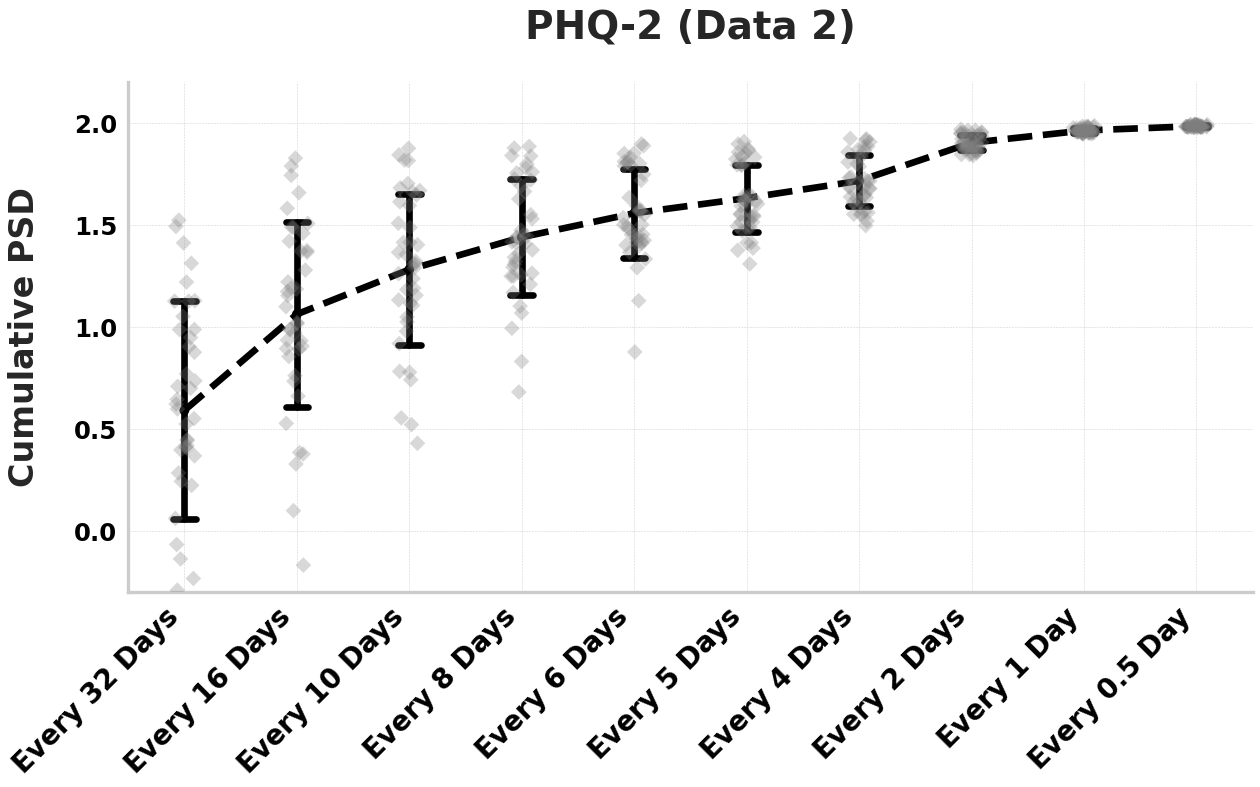

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and axes with specified size and resolution
fig, ax = plt.subplots(figsize=(16, 10), dpi=80)

# Create a strip plot for a preliminary view of data distribution
sns.stripplot(
    data=df_f_ppx_cum, 
    x="time", 
    y="ppx_log", 
    dodge=True,  # Separate points for the same time interval slightly for better visibility
    color='gray',  # Set color for all points
    ax=ax,  # Plot on the created axes
    alpha=0.3,  # Set transparency for points
    size=10,  # Set size of the points
    marker="D"  # Set marker style as diamond
)

# Create a point plot for a detailed view of data points
sns.pointplot(
    data=df_f_ppx_cum, 
    x="time", 
    y="ppx_log",
    color='black',  # Set line color
    linestyles=["--"],  # Set line style as dashed
    capsize=0.2,  # Set the width of the caps on error bars
    ax=ax,  # Plot on the created axes
    dodge=True,  # Adjust positions of points for clarity
    ci='sd'  # Use standard deviation for error bars
)

# Customize the plot lines for better visibility
lines = ax.get_lines()  # Get the list of line objects
for line in lines:
    line.set_linewidth(6)  # Set the line width for better visibility

# Set plot title and labels with customization for better readability
ax.set_title('PHQ-2 (Data 2)', fontsize=35, fontweight='bold', pad=40)
ax.set_xlabel('', fontweight='bold', fontsize=30, labelpad=30)  # Hide x-axis label
ax.set_ylabel('Cumulative PSD', fontweight='bold', fontsize=30, labelpad=30)

# Customize grid lines for enhanced readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

# Rotate and customize x-tick labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=25, fontweight='bold')

# Customize y-tick labels for consistency and readability
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(22)

# Set y-axis limits for consistent scale across plots
ax.set_ylim(-0.3, 2.2)

# Remove top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Customize the axes spines for visibility and aesthetics
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
# Optionally, set top and right spines if needed
ax.spines['top'].set_color('black')   # Only if you want the top spine visible
ax.spines['right'].set_color('black') # Only if you want the right spine visible

# Customize tick colors for consistency with the plot
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Apply a tight layout to ensure optimal spacing of plot elements
plt.tight_layout()

# Display the plot
plt.show()

# Save the figure with high resolution for publication or presentation
fig.savefig("PSD_Fisher.jpg", bbox_inches='tight', dpi=300)
